In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Giraph

In [3]:
logs_path = '/home/hduser/COE/benchmark/giraph'
g_log_files = [os.path.join(logs_path, f) for f in os.listdir(logs_path) if re.search(r'g\d', f) is None]
g_subgraph_log_files = [os.path.join(logs_path, f) for f in os.listdir(logs_path) if re.search(r'g\d', f) is not None]


In [ ]:
metrics = pd.DataFrame()
#metrics = np.ndarray()
log_files = g_log_files

for f in log_files:
    if os.path.isdir(f):
        continue
        
    try:
        f_name = os.path.split(f)[-1]
        print f_name
        algorithm,dataset, th = (f_name.split('.')[0]).split('_')
        lg_f = pd.read_csv(f, sep="\t", error_bad_lines=False, 
                           comment='#', header=None)
        lg_f['algorithm'] = algorithm
        lg_f['dataset'] = dataset
        lg_f['th'] = th
    except Exception as e:
        print e

    metrics = pd.concat((metrics, lg_f))


metrics

In [5]:
def cal_compute_time(df):
    df = df[~df[0].isna()] 
    return df[df[0].str.contains("Superstep")][1].sum()

#compute_time = metrics.groupby(['dataset','sg','algorithm']).apply(lambda df: df[df[0].str.contains("Superstep")][1].sum())
g_compute_time = metrics.groupby(['algorithm','dataset','th']).apply(cal_compute_time)

#compute_time = compute_time.reset_index(0, drop=True)
g_compute_time = g_compute_time.reset_index()
g_compute_time[0] = g_compute_time[0]/1000.0
g_compute_time['giraph'] = g_compute_time[0]
g_compute_time

,algorithm,dataset,th,0,giraph
0,bfs,livejournal,t16,9.587,9.587
1,bfs,livejournal,t16-tinpt2,10.126,10.126
2,bfs,livejournal,t16-tinpt4,7.518,7.518
3,bfs,livejournal,t16-tinpt8,0.000,0.000
4,bfs,livejournal,t2,24.960,24.960
5,bfs,livejournal,t4,16.380,16.380
6,bfs,livejournal,t8,12.304,12.304
7,bfs,orkut,t12,13.522,13.522
8,bfs,orkut,t16,11.399,11.399
9,bfs,orkut,t2,37.365,37.365


In [6]:
def cal_noncompute_time(df):
    df = df[~df[0].isna()] 
    return df[df[0].str.contains("ms") & ~df[0].str.contains("Superstep")]

def cal_other_metrics(df):
    df = df[~df[0].isna()] 
    return df[~df[0].str.contains("ms")]

g_noncompute_time = metrics.groupby(['algorithm','dataset','th']).apply(cal_noncompute_time)
g_other_counters = metrics.groupby(['algorithm','dataset','th']).apply(cal_other_metrics)

g_noncompute_time[1] = g_noncompute_time[1]/1000.0
g_noncompute_time['giraph'] = g_noncompute_time[1]

## MonetDB

In [8]:
logs_path = '/home/hduser/COE/benchmark/mdb'
m_log_files = [os.path.join(logs_path, f) for f in os.listdir(logs_path) if f.endswith('csv') and re.search(r'g\d', f) is None]
m_subgraph_log_files = [os.path.join(logs_path, f) for f in os.listdir(logs_path) if f.endswith('csv') and re.search(r'g\d', f) is not None]


In [ ]:
log_files = m_log_files
m_metrics = pd.DataFrame()

for f in log_files:
    if os.path.isdir(f) or 'metrics' in f:
        continue     
    try:
        f_name = os.path.split(f)[-1]
        algorithm,dataset,th = (f_name.split('.')[0]).split('_')
        lg_f = pd.read_csv(f, sep=",", error_bad_lines=False, comment='#')
        lg_f['algorithm'] = algorithm
        lg_f['dataset'] = dataset
        lg_f['th'] = th
    except Exception as e:
        print f_name
        print e

    m_metrics = pd.concat((m_metrics, lg_f))
    
# S8 files
m_metrics

# TIME

In [10]:
f = {'run':['sum'], 'RAM':['mean'], 'Virtual':['mean'], 'cpu':['mean']}

m_compute_time = m_metrics.groupby(['algorithm','dataset','th']).agg(f)
m_compute_time = m_compute_time.reset_index()
m_compute_time.columns = m_compute_time.columns.droplevel(1)

# to seconds
m_compute_time['run'] = m_compute_time['run']/1000000.0
m_compute_time['monetdb'] = m_compute_time['run']

m_compute_time


,algorithm,dataset,th,RAM,run,cpu,Virtual,monetdb
0,bfs,fiendster,t16,NaN,1344.334130,77.782609,NaN,1344.334130
1,bfs,fiendster,t16-extra,NaN,1122.303728,77.304348,NaN,1122.303728
2,bfs,livejournal,t12,980.433111,6.127245,45.500000,1812.938667,6.127245
3,bfs,livejournal,t16,1283.996778,5.591044,57.250000,1917.759222,5.591044
4,bfs,livejournal,t2,683.471550,17.140581,8.666667,1307.388950,17.140581
5,bfs,livejournal,t4,872.247143,10.158777,18.333333,1507.446143,10.158777
6,bfs,livejournal,t8,823.378800,14.648132,31.083333,1487.088600,14.648132
7,bfs,orkut,t12,1830.927294,9.536444,39.875000,2785.538353,9.536444
8,bfs,orkut,t16,1966.813125,8.544317,52.000000,3101.736500,8.544317
9,bfs,orkut,t2,1722.174576,50.318204,8.625000,2842.282515,50.318204


In [11]:
combined_compute_time = g_compute_time.merge(m_compute_time, how='right', on=['algorithm','dataset','th'])
#combined_compute_time['giraph'] = combined_compute_time[0]
#combined_compute_time['mdb'] = combined_compute_time['run']
combined_compute_time

,algorithm,dataset,th,0,giraph,RAM,run,cpu,Virtual,monetdb
0,bfs,livejournal,t16,9.587,9.587,1283.996778,5.591044,57.250000,1917.759222,5.591044
1,bfs,livejournal,t2,24.960,24.960,683.471550,17.140581,8.666667,1307.388950,17.140581
2,bfs,livejournal,t4,16.380,16.380,872.247143,10.158777,18.333333,1507.446143,10.158777
3,bfs,livejournal,t8,12.304,12.304,823.378800,14.648132,31.083333,1487.088600,14.648132
4,bfs,orkut,t12,13.522,13.522,1830.927294,9.536444,39.875000,2785.538353,9.536444
5,bfs,orkut,t16,11.399,11.399,1966.813125,8.544317,52.000000,3101.736500,8.544317
6,bfs,orkut,t2,37.365,37.365,1722.174576,50.318204,8.625000,2842.282515,50.318204
7,bfs,orkut,t4,22.718,22.718,1511.843846,18.783317,14.750000,2616.792769,18.783317
8,bfs,orkut,t8,17.081,17.081,1331.559222,10.826825,28.375000,2441.570667,10.826825
9,cc,livejournal,t12,23.873,23.873,1475.297359,60.585752,28.583333,2540.665172,60.585752


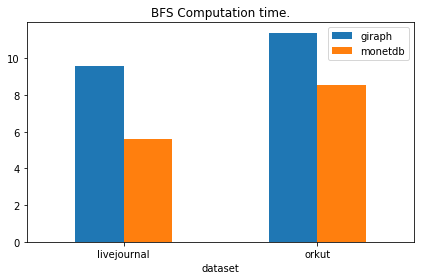

In [13]:
fig, ax = plt.subplots(1,1)

(combined_compute_time.query('algorithm=="bfs" and dataset<>"fiendster" and th=="t16"')
 .set_index(['dataset'])[['giraph','monetdb']]
 .plot.bar(ax=ax, rot=0, title="BFS Computation time."))

fig.tight_layout()
fig.savefig('plots/bfs_t16.png', dpi=800)

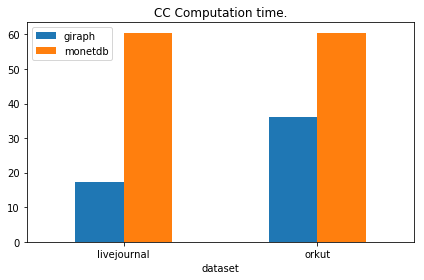

In [14]:
fig, ax = plt.subplots(1,1)

(combined_compute_time.query('algorithm=="cc" and dataset<>"fiendster" and th=="t16"')
 .set_index(['dataset'])[['giraph','monetdb']]
 .plot.bar(ax=ax, rot=0, title='CC Computation time.'))

fig.tight_layout()
fig.savefig('plots/cc_t16.png', dpi=800)

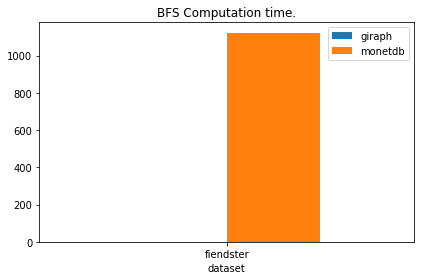

In [22]:
fig, ax = plt.subplots(1,1)

(combined_compute_time.query('algorithm=="bfs" and dataset=="fiendster" and th=="t16-extra"')
 .set_index(['dataset'])[['giraph','monetdb']]
 .plot.bar(ax=ax, rot=0,title="BFS Computation time."))

fig.tight_layout()
fig.savefig('plots/friendster_t16.png', dpi=800)

In [15]:
msk = g_noncompute_time[0].str.startswith('Total')
combined_total_time = g_noncompute_time[msk].merge(m_compute_time, how='right', on=['algorithm','dataset','th'])

combined_total_time

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'algorithm' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'dataset' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'th' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


,0,1,2,3,algorithm,dataset,th,giraph,RAM,run,cpu,Virtual,monetdb
0,Total (ms),29.553,0.0,29553.0,bfs,livejournal,t16,29.553,1283.996778,5.591044,57.250000,1917.759222,5.591044
1,Total (ms),47.342,0.0,47342.0,bfs,livejournal,t2,47.342,683.471550,17.140581,8.666667,1307.388950,17.140581
2,Total (ms),35.482,0.0,35482.0,bfs,livejournal,t4,35.482,872.247143,10.158777,18.333333,1507.446143,10.158777
3,Total (ms),31.572,0.0,31572.0,bfs,livejournal,t8,31.572,823.378800,14.648132,31.083333,1487.088600,14.648132
4,Total (ms),35.415,0.0,35415.0,bfs,orkut,t12,35.415,1830.927294,9.536444,39.875000,2785.538353,9.536444
5,Total (ms),31.815,0.0,31815.0,bfs,orkut,t16,31.815,1966.813125,8.544317,52.000000,3101.736500,8.544317
6,Total (ms),59.497,0.0,59497.0,bfs,orkut,t2,59.497,1722.174576,50.318204,8.625000,2842.282515,50.318204
7,Total (ms),43.970,0.0,43970.0,bfs,orkut,t4,43.970,1511.843846,18.783317,14.750000,2616.792769,18.783317
8,Total (ms),39.563,0.0,39563.0,bfs,orkut,t8,39.563,1331.559222,10.826825,28.375000,2441.570667,10.826825
9,Total (ms),44.405,0.0,44405.0,cc,livejournal,t12,44.405,1475.297359,60.585752,28.583333,2540.665172,60.585752


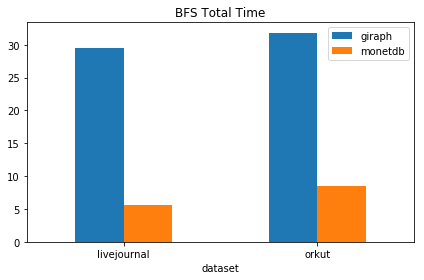

In [16]:
fig, ax = plt.subplots(1,1)

(combined_total_time.query('algorithm=="bfs" and dataset<>"fiendster" and th=="t16"')
 .set_index(['dataset'])[['giraph','monetdb']]
 .plot.bar(ax=ax, rot=0, title="BFS Total Time"))

fig.tight_layout()
fig.savefig('plots/bfs_total_t16.png', dpi=800)

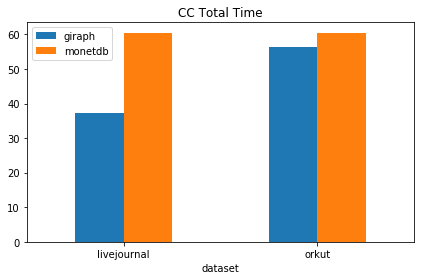

In [17]:
fig, ax = plt.subplots(1,1)

(combined_total_time.query('algorithm=="cc" and dataset<>"fiendster" and th=="t16"')
 .set_index(['dataset'])[['giraph','monetdb']]
 .plot.bar(ax=ax, rot=0, title="CC Total Time"))

fig.tight_layout()
fig.savefig('plots/cc_total_t16.png', dpi=800)

# MEMORY

In [18]:
msk = g_other_counters[0].str.contains('bytes')
combined_other_counters = g_other_counters[msk].reset_index(drop=True).merge(m_compute_time,
                                                                        how='right', on=['algorithm','dataset','th'])
combined_other_counters['giraph'] = combined_other_counters[1]*1.0e-9
combined_other_counters['mdb_RAM'] = combined_other_counters['RAM']/1024.0
combined_other_counters['mdb_VM'] = combined_other_counters['Virtual']/1024.0
combined_other_counters['counter'] = combined_other_counters[0]
combined_other_counters = combined_other_counters.dropna()

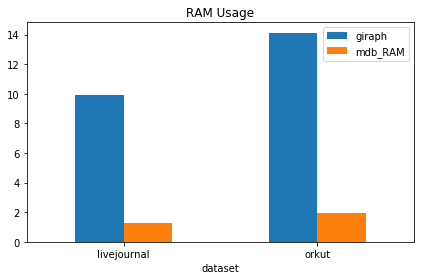

In [19]:
fig, ax = plt.subplots(1,1)

msk = combined_other_counters.counter.str.contains('Physical')
(combined_other_counters[msk].query('algorithm=="bfs" and dataset<>"fiendster" and th=="t16"')
 .set_index(['dataset'])[['giraph','mdb_RAM']]
 .plot.bar(ax=ax, rot=0, title="RAM Usage"))

fig.tight_layout()
fig.savefig('plots/bfs_ram.png', dpi=800)

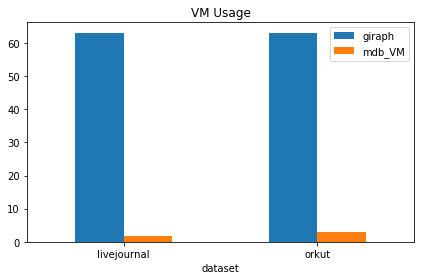

In [20]:
fig, ax = plt.subplots(1,1)

msk = combined_other_counters.counter.str.contains('Virtual')
(combined_other_counters[msk].query('algorithm=="bfs" and dataset<>"fiendster" and th=="t16"')
 .set_index(['dataset'])[['giraph','mdb_VM']]
 .plot.bar(ax=ax, rot=0, title="VM Usage"))

fig.tight_layout()
fig.savefig('plots/bfs_vm.png', dpi=800)

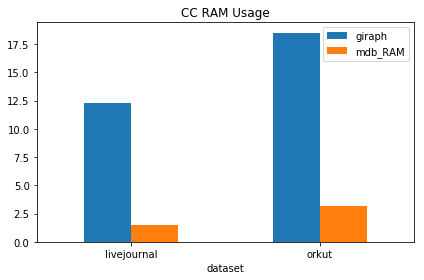

In [21]:
fig, ax = plt.subplots(1,1)

msk = combined_other_counters.counter.str.contains('Physical')
(combined_other_counters[msk].query('algorithm=="cc" and dataset<>"fiendster" and th=="t16"')
 .set_index(['dataset'])[['giraph','mdb_RAM']]
 .plot.bar(ax=ax, rot=0, title="CC RAM Usage"))

fig.tight_layout()
fig.savefig('plots/cc_ram.png', dpi=800)

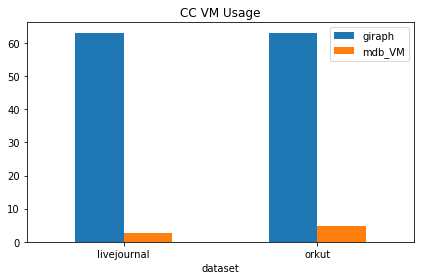

In [22]:
fig, ax = plt.subplots(1,1)

msk = combined_other_counters.counter.str.contains('Virtual')
(combined_other_counters[msk].query('algorithm=="cc" and dataset<>"fiendster" and th=="t16"')
 .set_index(['dataset'])[['giraph','mdb_VM']]
 .plot.bar(ax=ax, rot=0, title="CC VM Usage"))

fig.tight_layout()
fig.savefig('plots/cc_vm.png', dpi=800)

In [ ]:
fig, ax = plt.subplots(1,2)

for algo, axes in zip(combined_other_counters.algorithm.unique(), ax):
    msk = combined_other_counters.counter.str.contains('Virtual')
    (combined_other_counters[msk].query('algorithm=="%s" and dataset<>"fiendster" and th=="t16"')
     .set_index(['dataset'])[['giraph','mdb_VM']]
     .plot.bar(ax=ax, rot=0, title="CC VM Usage"))

fig.tight_layout()

# SCALING UP

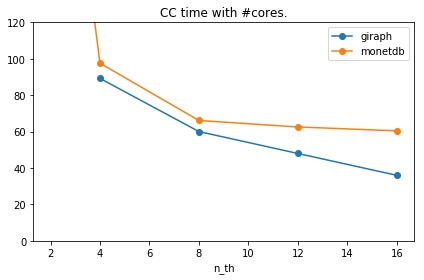

In [28]:
fig, ax = plt.subplots(1,1)

combined_compute_time['n_th'] = combined_compute_time['th'].str.extract('(\d+)').astype(int)
(combined_compute_time.query('algorithm=="cc" and dataset=="orkut"')
 .sort_values('n_th')
 .plot(x='n_th', y=['giraph','monetdb'],ax=ax, rot=0, marker='o', title="CC time with #cores."))

ax.set_ylim(0,120)
fig.tight_layout()
fig.savefig('plots/cc_orkut_scaling.png', dpi=800)

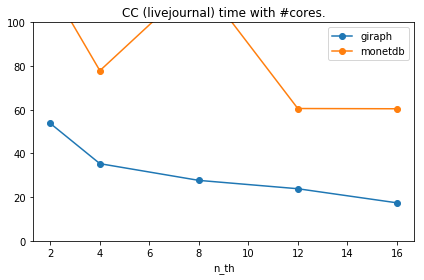

In [36]:
fig, ax = plt.subplots(1,1)

(combined_compute_time.query('algorithm=="cc" and dataset=="livejournal"')
 .sort_values('n_th')
 .plot(x='n_th', y=['giraph','monetdb'],ax=ax, rot=0, marker='o', title="CC (livejournal) time with #cores."))

ax.set_ylim(0,100)
fig.tight_layout()
fig.savefig('plots/cc_lj_scaling.png', dpi=800)

In [87]:
combined_other_counters.plot?